In [ ]:
# Check Training

In [52]:
import pickle

In [53]:
! ls result1/model/

best.checkpoint       model.643.checkpoint  model.855.checkpoint
best.result.json      model.644.checkpoint  model.869.checkpoint
model.0.checkpoint    model.672.checkpoint  model.873.checkpoint
model.118.checkpoint  model.67.checkpoint   model.878.checkpoint
model.142.checkpoint  model.682.checkpoint  model.879.checkpoint
model.265.checkpoint  model.684.checkpoint  model.87.checkpoint
model.272.checkpoint  model.698.checkpoint  model.882.checkpoint
model.316.checkpoint  model.6.checkpoint    model.886.checkpoint
model.335.checkpoint  model.703.checkpoint  model.890.checkpoint
model.363.checkpoint  model.708.checkpoint  model.8.checkpoint
model.381.checkpoint  model.70.checkpoint   model.900.checkpoint
model.400.checkpoint  model.711.checkpoint  model.902.checkpoint
model.403.checkpoint  model.719.checkpoint  model.903.checkpoint
model.408.checkpoint  model.722.checkpoint  model.908.checkpoint
model.438.checkpoint  model.726.checkpoint  model.90.checkpoint
model.45.checkpoint   model.7

In [54]:
obj=pickle.load(open("result1/model/train_loss.pkl","rb"))

In [55]:
obj.loss_dict_history

[{'target': 2.6984215676784515,
  'total': 2.6984215676784515,
  'mse': 2.6984215676784515,
  'proj_f': 0.0,
  'proj_g': 0.0,
  '*norm2-fx': 1.2721634060144424,
  '*norm2-gx': 1.1505664363503456,
  '*norm2-hx': 4.235181093215942,
  '*norm2-jx': 0.0,
  '*norm2-Lx': 0.0,
  'consistency_loss': 42.88690662384033},
 {'target': 2.349489345215261,
  'total': 2.349489345215261,
  'mse': 2.3494893442839384,
  'proj_f': 0.0,
  'proj_g': 0.0,
  '*norm2-fx': 1.2432114258408546,
  '*norm2-gx': 1.2731453403830528,
  '*norm2-hx': 4.351801753044128,
  '*norm2-jx': 0.0,
  '*norm2-Lx': 0.0,
  'consistency_loss': 41.842581272125244},
 {'target': 2.5028643012046814,
  'total': 2.5028643012046814,
  'mse': 2.5028643012046814,
  'proj_f': 0.0,
  'proj_g': 0.0,
  '*norm2-fx': 1.1395567208528519,
  '*norm2-gx': 1.1687524393200874,
  '*norm2-hx': 4.033355951309204,
  '*norm2-jx': 0.0,
  '*norm2-Lx': 0.0,
  'consistency_loss': 40.51605844497681},
 {'target': 2.4150255769491196,
  'total': 2.4150255769491196,
  

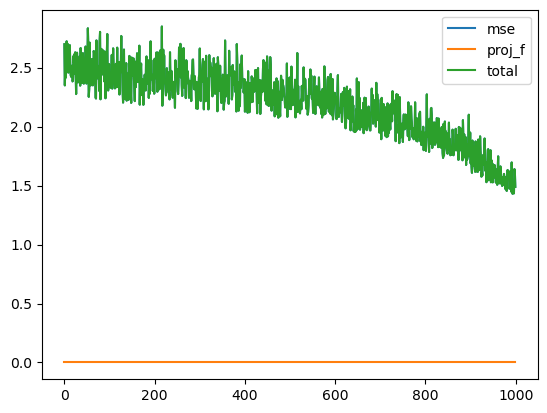

In [56]:
import matplotlib.pyplot as plt

mse=[e["mse"] for e in obj.loss_dict_history]
plt.plot(mse,label="mse")

proj_f=[e["proj_f"] for e in obj.loss_dict_history]
plt.plot(proj_f,label="proj_f")

loss=[e["total"] for e in obj.loss_dict_history]
plt.plot(loss,label="total")

plt.legend()

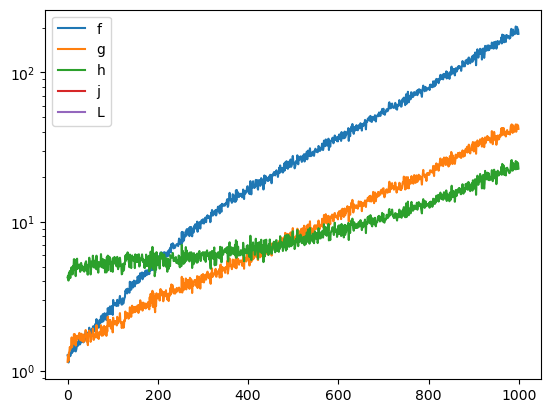

In [57]:
x=[e['*norm2-fx'] for e in obj.loss_dict_history]
plt.plot(x,label="f")
x=[e['*norm2-gx'] for e in obj.loss_dict_history]
plt.plot(x,label="g")
x=[e['*norm2-hx'] for e in obj.loss_dict_history]
plt.plot(x,label="h")
x=[e['*norm2-jx'] for e in obj.loss_dict_history]
plt.plot(x,label="j")
x=[e['*norm2-Lx'] for e in obj.loss_dict_history]
plt.plot(x,label="L")

plt.legend()
plt.yscale("log")


In [58]:
# Check Trained model

In [32]:
from ddm.trainer import SystemTrainer
from ddm.model import NeuralDissipativeSystem
from omegaconf import OmegaConf
import torch
import numpy as np
import logging
logging.basicConfig(level=logging.INFO)

#config_path="result/config.yaml"
#config_path="study/trial0064/config.yaml"
config_path="result1/config.yaml"

config = OmegaConf.load(config_path)


In [33]:
config

{'method': 'ddm', 'state_dim': 2, 'obs_dim': 2, 'in_dim': 1, 'epoch': 1000, 'pre_fit_epoch': -1, 'patience': 5, 'batch_size': 10, 'activation': 'sigmoid', 'optimizer': 'rmsprop', 'lr': 0.00019888327592826083, 'v_type': 'single', 'scale_f': 0.7666769010534801, 'scale_g': 1.0, 'scale_h': 1.0, 'scale_j': 1.0, 'scale_L': 1.0, 'train_valid_ratio': 0.2, 'data_train': './dataset/004nlink.train', 'data_test': './dataset/004nlink.test', 'init_model': 'study/trial0060/model/best.checkpoint', 'result_path': 'result1', 'dissipative_mode': 'naive', 'gamma': 0.01, 'alpha_f': 0.001, 'alpha_g': 0.001, 'alpha_h': 1.036132595783239e-10, 'one_step_loss': False, 'diag_g': False, 'diag_j': False, 'detach_f': False, 'detach_g': False, 'detach_h': False, 'detach_j': False, 'detach_diff_f': False, 'detach_diff_g': False, 'fix_f': False, 'fix_g': False, 'fix_h': False, 'fix_j': False, 'fix_L': False, 'with_bn_f': False, 'with_bn_g': False, 'with_bn_h': False, 'with_bn_j': False, 'with_bn_L': False, 'without_j'

In [34]:
device="cpu"
#path="result/model/best.checkpoint"
#path="study/trial0064/model/best.checkpoint"
path="result1/model/best.checkpoint"
model=NeuralDissipativeSystem(config=config,device=device)
trainer=SystemTrainer(config=config,model=model,device=device)
trainer.load_ckpt(path)


INFO:logger:[load ckeck point]result1/model/best.checkpoint


{'epoch': 980,
 'model_state_dict': OrderedDict([('f_nn.linears.0.weight',
               tensor([[ 2.3192, -0.0642],
                       [-1.9487, -2.6669],
                       [-1.8825,  0.8532],
                       [-2.0093,  0.9011],
                       [ 1.7280,  2.4370],
                       [ 0.7270,  0.3993],
                       [-0.2115, -2.4161],
                       [-1.2778,  0.8652],
                       [ 1.1862,  1.5258],
                       [ 0.7405,  0.1988],
                       [ 0.3657, -1.9234],
                       [-0.6049,  1.1485],
                       [-0.2932, -0.8553],
                       [-2.0077,  1.3471],
                       [ 1.1097,  0.1986],
                       [-1.6049,  0.0222]], device='cuda:0')),
              ('f_nn.linears.0.bias',
               tensor([ 0.4143, -0.2169,  0.2369,  0.3562,  0.5942, -0.3470,  0.6208, -0.6225,
                        0.0563, -0.7169,  0.2835,  0.1503, -0.3430,  0.4873, -0.1671

In [35]:
trainer.model.set_qrs(q=1,r=1,s=0)

In [36]:
import numpy as np
import torch
def get_grid_data(min_v, max_v, delta):
  x1 = np.arange(min_v, max_v, delta)
  x2 = np.arange(min_v, max_v, delta)
  xx = np.meshgrid(x1,x2)
  x_grid_data=np.transpose(np.reshape(np.array(xx),(2,-1)))
  ###
  n=len(x1)
  i1 = np.arange(n)
  i2 = np.arange(n)
  ii = np.meshgrid(i1,i2)
  i_grid_data = np.transpose(np.reshape(np.array(ii),(2,-1)))
  conter_x=(x1,x2)
  return x_grid_data, i_grid_data, conter_x, n


In [37]:
min_v=-1.5
max_v=1.5
delta=0.1

x_grid_data, i_grid_data, conter_x, n = get_grid_data(min_v, max_v, delta)
x_grid_data

x=torch.tensor(x_grid_data,dtype=torch.float32,device=device)
fx_new, gx_new, jx_mat, hx, fx_diff, gx_diff, _ =trainer.model.forward_proj(x)


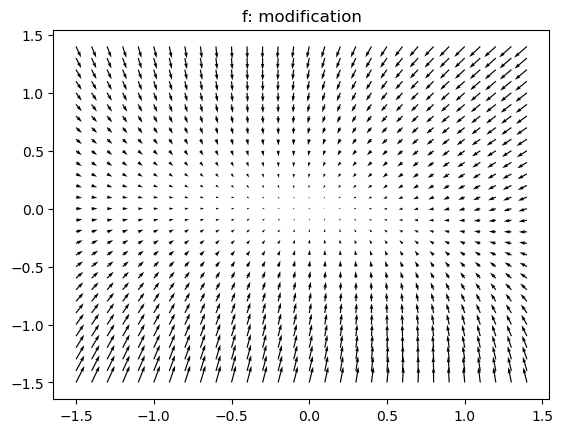

In [38]:
import matplotlib.pyplot as plt
f_modify_=fx_new.detach().cpu().numpy()/10.0
plt.quiver(x_grid_data[:,0],x_grid_data[:,1],f_modify_[:,0],f_modify_[:,1])

#CS=plt.contour(conter_x[0],conter_x[1],Z,levels=30)
#plt.clabel(CS, inline=True)
plt.title("f: modification")
plt.show()


In [39]:
batch_size=3
x0,u,dt_u,t = trainer.get_default_input(batch_size=batch_size,T=10,dt_x=0.1)
#u[t_u<0.25,:,:]=1.0
#u[t_u<0.05,:,:]=0.0

In [40]:
y,x_sol=model(x0,u,dt_u,t)
print("x_sol",x_sol.shape)
print("y",y.shape)
print("u",u.shape)

x_sol torch.Size([100, 3, 2])
y torch.Size([100, 3, 2])
u torch.Size([100, 3, 1])


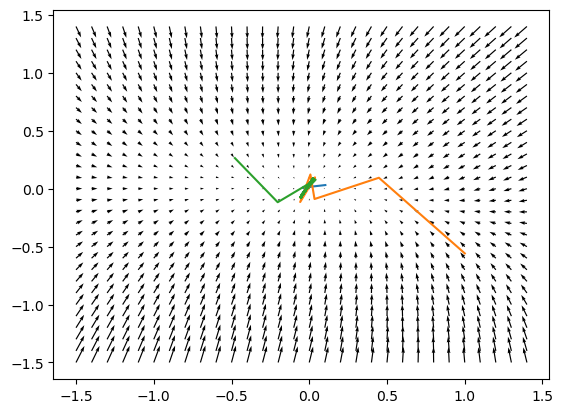

In [41]:
f_modify_=fx_new.detach().cpu().numpy()/10.0
plt.quiver(x_grid_data[:,0],x_grid_data[:,1],f_modify_[:,0],f_modify_[:,1])
x=x_sol.detach().numpy()
for i in range(batch_size):
    plt.plot(x[:,i,0],x[:,i,1])
plt.show()

In [42]:
import ddm.util_data
from ddm.util_data import DiosDataset
test_data=ddm.util_data.load_all_data("dataset/004nlink.test",{})
testset = DiosDataset(test_data, train=False)

INFO:ddm.util_data:[LOAD] dataset/004nlink.test.obs.npy
INFO:ddm.util_data:[LOAD] dataset/004nlink.test.input.npy
INFO:ddm.util_data:[LOAD] dataset/004nlink.test.state.npy
INFO:ddm.util_data:[LOAD] dataset/004nlink.test.stable.npy


In [43]:
test_loss,y_pred, x_sol, x0 =trainer.pred(test_data,batch_size=1,device="cpu")


INFO:logger:test-loss: 1.132  test-target-loss: 1.132  test-total-loss: 1.132  test-mse-loss: 1.132  test-proj_f-loss: 0.000  test-proj_g-loss: 0.000  *test-norm2-fx: 174.101  *test-norm2-gx: 41.065  *test-norm2-hx: 22.941  *test-norm2-jx: 0.000  *test-norm2-Lx: 0.000  test-consistency_loss-loss: 1.516


y_true: (10, 200, 2)
y_pred: (10, 200, 2)


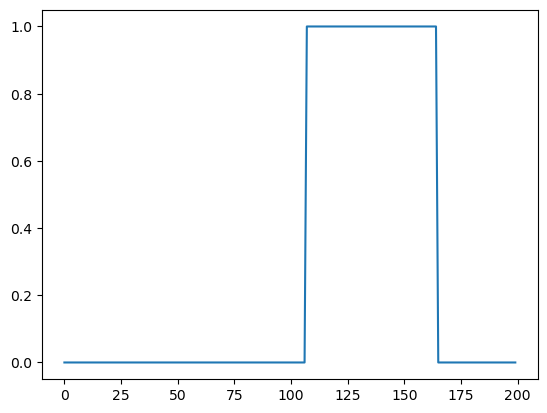

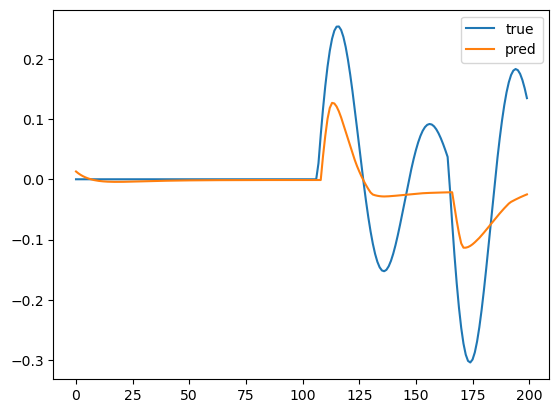

0.9610387

In [44]:
y_true=test_data.obs
print("y_true:",y_true.shape)
print("y_pred:",y_pred.shape)
idx=2

plt.plot(test_data.input[idx,:,0])
plt.show()
plt.plot(y_true[idx,:,0],label="true")
plt.plot(y_pred[idx,:,0], label="pred")
plt.legend()
plt.show()
a=[np.sum((y_true[i,:,0]-y_pred[i,:,0])**2) for i in range(10)]
np.mean(a)

In [45]:
#x_sol.shape
np.sum((y_true[i,:,0]-y_pred[i,:,0])**2)
#torch.mean(torch.sum((y[:T_x]-y_true[:T_x])**2,dim=(-2,-1)))

1.3175706

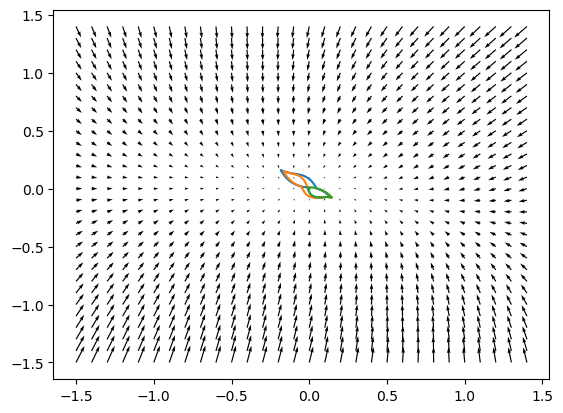

In [46]:
f_modify_=fx_new.detach().cpu().numpy()/10.0
plt.quiver(x_grid_data[:,0],x_grid_data[:,1],f_modify_[:,0],f_modify_[:,1])
for i in range(3):
    plt.plot(x_sol[i,:,0],x_sol[i,:,1])
plt.show()

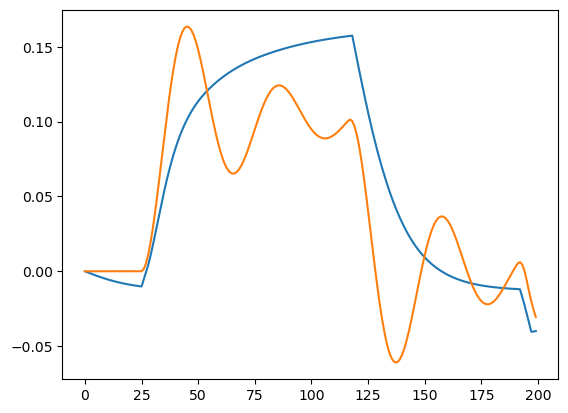

In [47]:
idx=3
plt.plot(x_sol[idx,:,0])
plt.plot(test_data.state[idx,:,0])

In [48]:
test_data.state.shape

(10, 200, 2)

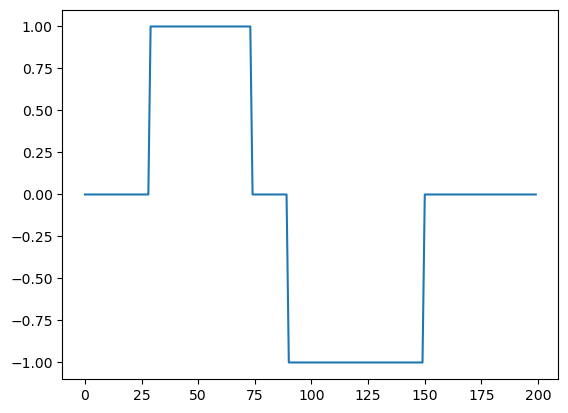

In [49]:
plt.plot(test_data.input[0,:,0])

In [ ]:
# Check optimization

In [89]:
import glob
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np


def plot_opt(basepath="study",keyword="total", k=5, mode="train", min_mode=True, trial_names=None, target_trial_names=None):
    """
    This method shows the optimization results.
    The top-k or selected trials will be highlighted.
    Args:
      basepath (str): optimization directory
      keyword (str): total/
      k  (int): highlight top-k trials
      mode (str): train/valid/test
      min_mode (bool): this flag should be true if optimization is minimization
      trial_names (List[str]): all trial lists. If this trial_names is None, all trial is obtained from study directory.
      target_trial_names (List[str]): specifies the trials to highlight in a list
    Returns:
      out_name_list (List[str]: 
    """
    ## construct filename_list
    filename_list=[]
    if trial_names is None:
        for filename in glob.glob(basepath+"/**/model/"+mode+"_loss.pkl"):
            if os.path.isfile(filename):
                filename_list.append(filename)
            else:
                print("skip:", filename)
    else:
        for name in trial_names:
            filename =basepath+"/"+name+"/model/"+mode+"_loss.pkl"
            if os.path.isfile(filename):
                filename_list.append(filename)
            else:
                print("skip:", filename)
    ## load data from filename_list
    data=[]
    for filename in filename_list:
        obj=pickle.load(open(filename,"rb"))
        val=[e[keyword] for e in obj.loss_dict_history]
        if min_mode:
            val_opt=min(val)
        else:
            val_opt=max(val)
        name=filename.split("/")[1]
        data.append((name, val,val_opt))

    if target_trial_names is not None:
        target_index_list=[]
        for i,e in enumerate(data):
            if e[0] in target_trial_names:
                target_index_list.append(i)
    elif min_mode:
        target_index_list=np.array([val_opt for _,_,val_opt in data]).argsort()[:k]
    else:
        target_index_list=np.array([val_opt for _,_,val_opt in data]).argsort()[-k:]
    ## plot
    for i in target_index_list:
        name,val,val_opt=data[i]
        plt.plot(val,label=name)
    for i,el in enumerate(data):
        name,val,val_opt=el
        if i not in target_index_list:
            plt.plot(val,":",alpha=0.2)
    best_i=target_index_list[0]
    best_val=data[best_i][2]
    print(best_i,data[best_i][0],best_val)
    plt.title(mode+" "+keyword)
    plt.legend()
    ## name list
    out_name_list=[data[i][0] for i in target_index_list]
    return out_name_list,data[best_i][0],best_val
    
out_name_list, best_name, best_val=plot_opt(basepath="study",keyword="total", k=5)
plt.ylim(0,best_val*4)


IndexError: index 0 is out of bounds for axis 0 with size 0

79 2.37659415602684


['trial0098', 'trial0024', 'trial0060', 'trial0092', 'trial0097']

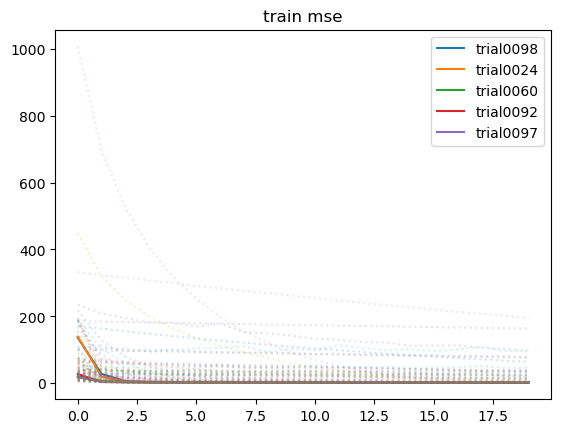

In [85]:
plot_opt(keyword="mse", k=5)

(0.0, 0.1)

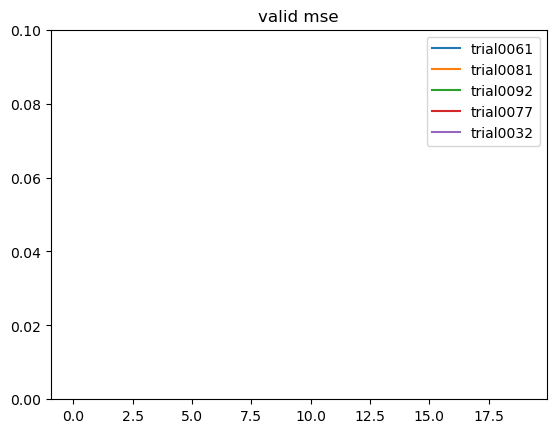

In [80]:
plot_opt(keyword="mse", k=5,mode="valid")
plt.ylim(0,0.1)


['trial0011',
 'trial0013',
 'trial0062',
 'trial0023',
 'trial0080',
 'trial0073',
 'trial0046',
 'trial0022',
 'trial0007',
 'trial0079']

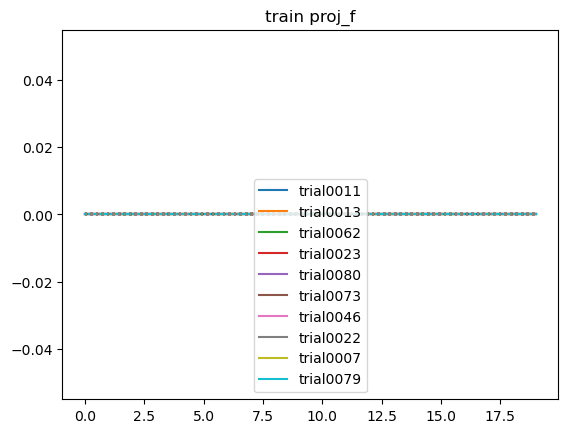

In [81]:
plot_opt(keyword="proj_f", k=10, min_mode=False)

['trial0098', 'trial0024', 'trial0060', 'trial0092', 'trial0097']

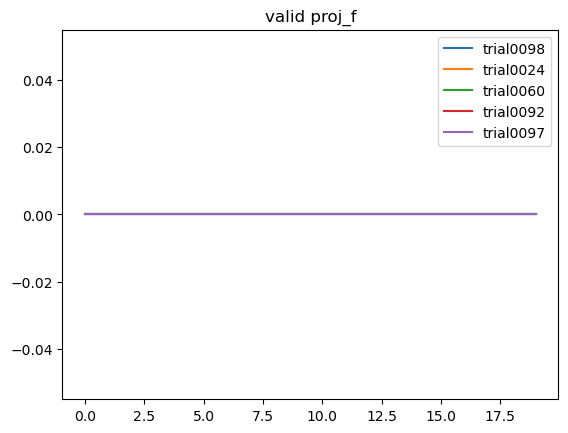

In [82]:
plot_opt(keyword="proj_f", min_mode=False,mode="valid",trial_names=out_name_list)

['trial0013', 'trial0011', 'trial0059', 'trial0099', 'trial0083']

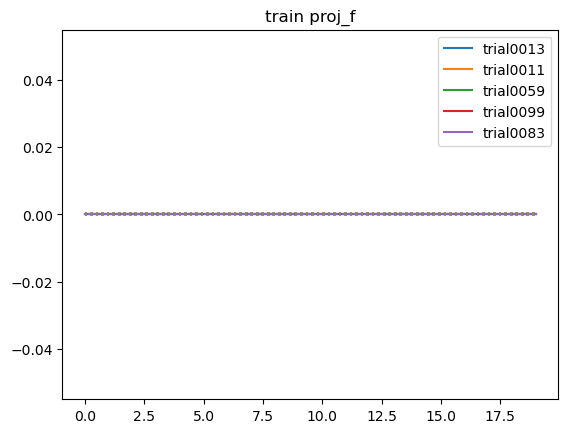

In [70]:
plot_opt(keyword="proj_f", k=10, min_mode=False,target_trial_names=out_name_list)

[]

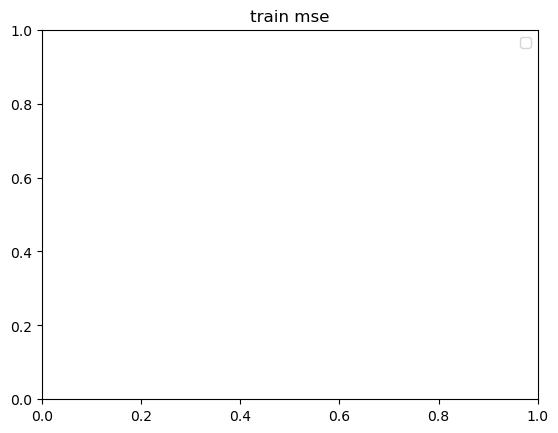

In [71]:
plot_opt(basepath="study_baseline",keyword="mse", k=5)

In [64]:
np.eye(3,4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])